## Calculations

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
from uncertainties import ufloat
from uncertainties.umath import *

#### 1

In [58]:
#rod diameter
d_r = ufloat(.00895, .00005, tag='l_r')
#rod length
l_r = ufloat(.60041, .00005, tag='d_r')
#mass of rod
m_r = ufloat(.10030, .00005, tag='m_r')
l_d = ufloat(.01643, .00005, tag='l_d')
d_d = ufloat(.10170, .00005, tag='d_d')
#mass of disk
m_d = ufloat(1.0268, .00005, tag='m_d')
M = m_r + m_d


In [59]:
thread = ufloat(0.00975, 0.00005, tag='thread')
hole = ufloat(.00845, .00005, tag='hole')
l_p = l_r -hole - thread

In [60]:
cm_r = l_r/2 - hole
cm_d = l_p + l_d/2
print(cm_d)
g = 9.81
cm = (m_r*cm_r + m_d*cm_d)/(m_r + m_d)

0.59042+/-0.00009


#### 2

In [61]:
T = 2*np.pi*(cm/g)**(1/2)
print("Estimated period =", T, "sec")

Estimated period = 1.50635+/-0.00012 sec


#### 3

In [62]:
per_10 = np.array([1.35, 1.28, 1.32, 1.31, 1.41, 1.31, 1.43, 1.41, 1.41, 1.41])
per_avg = np.mean(per_10)
print("Average period =", per_avg, "sec")

Average period = 1.364 sec


#### 4

In [63]:
g_exp = 4*np.pi**2*cm/per_avg**2
print("g prediction =", g_exp, "m/s^2")

g prediction = 11.9644+/-0.0018 m/s^2


This value of g makes sense and is on the right order of magnitude.

#### 5

In [64]:
#is this taking into account that the rod isn't rotating about the end??? also i think l_r and d_r should be swapped or renamed becuase they were interchanged wrong here
I_r = (1/4)*m_r*(d_r/2)**2 + (1/12)*m_r*l_r**2 + m_r*cm_r**2

I_d = (1/4)*m_d*((d_d/2)**2+(d_r/2)**2) + (1/12)*m_d*l_d**2 + m_d*cm_d**2
I = I_r + I_d

In [65]:
print("Moment of Inertia for Rod =", I_r, "kg m^2")
print("Moment of Inertia for Disk =", I_d, "kg m^2")
print("")
print("Total Moment of Inertia =", I, "kg m^2")

Moment of Inertia for Rod = 0.011551+/-0.000007 kg m^2
Moment of Inertia for Disk = 0.35864+/-0.00011 kg m^2

Total Moment of Inertia = 0.37019+/-0.00011 kg m^2


#### 6

In [66]:
#data is organized as [angle, avg period]
#acg period was calculated by timing 20 oscillations and dividing by 20
per_20 = np.array([[5, 1.516], [10, 1.538], [30, 1.557], [50, 1.601]])

The small angle approximation started to become inaccurate after $5^\circ$ since the period grows substantially.

#### 7

In [67]:
L = 0.772
R = 6371
w = 2*np.pi/(3600*24)

In [68]:
a_cen = w**2*R*np.cos(L)**2

In [69]:
T_2 = 2*np.pi*(cm/(g+a_cen))**(1/2)
T_diff = abs(T_2 - T) # difference between period calculations with and without centripetal acceleration

In [70]:
print("The uncertainty would have to be equal or smaller than", T_diff.nominal_value)

The uncertainty would have to be equal or smaller than 1.3280641455448716e-06


#### 8
The encoder is set to 2000 ticks per rev. This makes the output in $0.18^\circ/tick$ 

#### 9
dropped from $10^\circ$

left-right wobble decreases substantially after a few seconds. Data was taken after the path of the pendulum was stable.

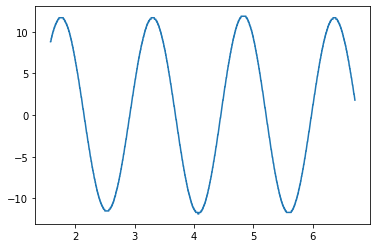

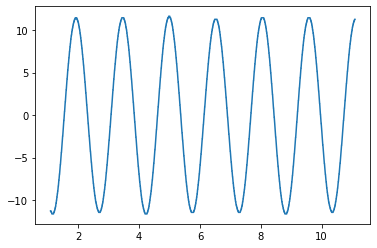

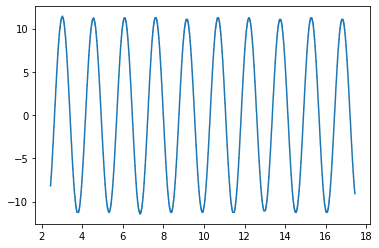

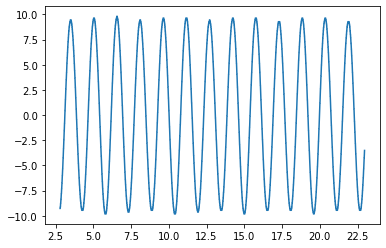

In [71]:
#open data from testdata1.csv
data = np.genfromtxt('testdata1.csv', delimiter=',')
times = data[:,0]
angles = data[:,1]*0.18
maxangle  = np.max(angles)
minangle = np.min(angles)
mid = (maxangle + minangle)/2
angles = angles - mid
uncertainty1 = 0.18/2*np.ones(len(angles))
plt.plot(times, angles)
plt.show()

data2 = np.genfromtxt('testdata2.csv', delimiter=',')
times2 = data2[:,0]
angles2 = data2[:,1]*0.18
maxangle2  = np.max(angles2)
minangle2 = np.min(angles2)
mid2 = (maxangle2 + minangle2)/2
angles2 = angles2 - mid2
uncertainty2 = 0.18*np.ones(len(angles2))
plt.plot(times2, angles2)
plt.show()

data3 = np.genfromtxt('testdata3.csv', delimiter=',')
times3 = data3[:,0]
angles3 = data3[:,1]*0.18
maxangle3  = np.max(angles3)
minangle3 = np.min(angles3)
mid3 = (maxangle3 + minangle3)/2
angles3 = angles3 - mid3
uncertainty3 = 0.18/2*np.ones(len(angles3))
plt.plot(times3, angles3)
plt.show()

data4 = np.genfromtxt('testdata4.csv', delimiter=',')
times4 = data4[:,0]
angles4 = data4[:,1]*0.18
maxangle4  = np.max(angles4)
minangle4 = np.min(angles4)
mid4 = (maxangle4 + minangle4)/2
angles4 = angles4 - mid4
uncertainty4 = 0.18/2*np.ones(len(angles4))
plt.plot(times4, angles4)
plt.show()


The period is about 1.5 seconds (from looking at it) which lines up with previous measurements. All data sets appear to be a sine wave with slight fluctuations in total amplitude. The amplitude goes up and down which violates the model of exponential decay.

y =  11.74194023832213 *sin( 4.098724146010695 *t +  0.6020895988865285 )*exp(-t/ 1503439897.693789 ) +  0.012646215241196673
chi squared = 3671.7367793750027
adjusted chi squared = 2.3312614472222237


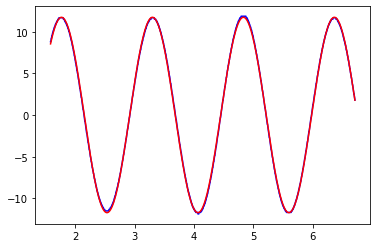

In [72]:
from scipy.optimize import curve_fit
def fitfunc(t, A, w, phi, Tdamp, C):
    return A*np.sin(w*t + phi)*np.exp(-t/Tdamp) + C

popt, pcov = curve_fit(fitfunc, times, angles, p0=[12, 2*np.pi/1.5, 0, 1000, 0], sigma=uncertainty1, absolute_sigma=True)
plt.plot(times, angles, 'b-', label='data')
plt.plot(times, fitfunc(times, *popt), 'r-', label='fit')
#print the eqn
print("y = ", popt[0], "*sin(", popt[1], "*t + ", popt[2], ")*exp(-t/", popt[3], ") + ", popt[4])
#calculate chi squared and adjusted chi squared
chi2 = np.sum(((fitfunc(times, *popt) - angles)/uncertainty1)**2)
dof = len(times) - len(popt)
chi2red = chi2/dof
print("chi squared =", chi2)
print("adjusted chi squared =", chi2red)
w1 = ufloat(popt[1], np.sqrt(pcov[1][1]))

y =  11.482308201049742 *sin( 4.096634359577745 *t +  -0.007117428666129681 )*exp(-t/ -2370587622.052597 ) +  -0.04464835789873142
chi squared = 1074.0837940906338
adjusted chi squared = 0.34748747786820894


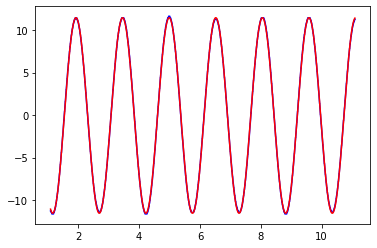

In [73]:
popt, pcov = curve_fit(fitfunc, times2, angles2, p0=[12, 2*np.pi/1.5, 0, 1000, 0], sigma=uncertainty2, absolute_sigma=True)
plt.plot(times2, angles2, 'b-', label='data')
plt.plot(times2, fitfunc(times2, *popt), 'r-', label='fit')
#print the eqn
print("y = ", popt[0], "*sin(", popt[1], "*t + ", popt[2], ")*exp(-t/", popt[3], ") + ", popt[4])
#calculate chi squared and adjusted chi squared
chi2 = np.sum(((fitfunc(times2, *popt) - angles2)/uncertainty2)**2)
dof = len(times2) - len(popt)
chi2red = chi2/dof
print("chi squared =", chi2)
print("adjusted chi squared =", chi2red)
w2 = ufloat(popt[1], np.sqrt(pcov[1,1]), tag='w')


y =  -11.236697158085207 *sin( 4.097076463287246 *t +  -1.3685389488344144 )*exp(-t/ -22966242508.370827 ) +  -0.043036283033749456
chi squared = 4673.059854040936
adjusted chi squared = 1.0943934084405003


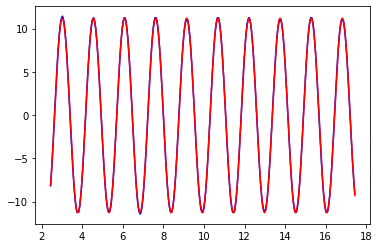

In [74]:
popt3,pcov3 = curve_fit(fitfunc, times3, angles3, p0=[11.5, 4.097, -2.5, 10000, 0], sigma=uncertainty3, absolute_sigma=True)
plt.plot(times3, angles3, 'b-', label='data')
plt.plot(times3, fitfunc(times3, *popt3), 'r-', label='fit')
#print the eqn
print("y = ", popt3[0], "*sin(", popt3[1], "*t + ", popt3[2], ")*exp(-t/", popt3[3], ") + ", popt3[4])
#calculate chi squared and adjusted chi squared
chi2 = np.sum(((fitfunc(times3, *popt3) - angles3)/uncertainty3)**2)
dof = len(times3) - len(popt)
chi2red = chi2/dof
print("chi squared =", chi2)
print("adjusted chi squared =", chi2red)
w3 = ufloat(popt3[1], np.sqrt(pcov3[1,1]))

y =  9.585706544574968 *sin( 4.099599822300072 *t +  -0.22871349188283943 )*exp(-t/ -2694425636.132051 ) +  -0.05477613623738645
chi squared = 16370.03671143093
adjusted chi squared = 2.7233466497140126


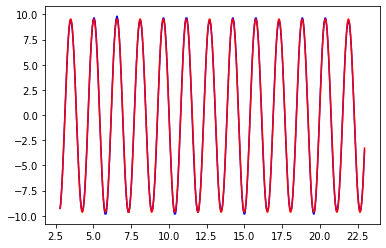

In [75]:
popt, pcov = curve_fit(fitfunc, times4, angles4, p0=[12, 2*np.pi/1.5, 0, 1000, 0], sigma=uncertainty4, absolute_sigma=True)
plt.plot(times4, angles4, 'b-', label='data')
plt.plot(times4, fitfunc(times4, *popt), 'r-', label='fit')
#print the eqn
print("y = ", popt[0], "*sin(", popt[1], "*t + ", popt[2], ")*exp(-t/", popt[3], ") + ", popt[4])
#calculate chi squared and adjusted chi squared
chi2 = np.sum(((fitfunc(times4, *popt) - angles4)/uncertainty4)**2)
dof = len(times4) - len(popt)
chi2red = chi2/dof
print("chi squared =", chi2)
print("adjusted chi squared =", chi2red)
w4 = ufloat(popt[1], np.sqrt(pcov[1,1]))

#### 11
The accepted value of g in Kingston is 9.805502389054098 m/s^2

In [76]:
phi = 44.2311717 * np.pi/180
g = 9.7803267714*(1 + 0.00193185138639*np.sin(phi)**2)/(np.sqrt(1 - 0.00669437999013 * np.sin(phi)**2))
print("g =", g)

g = 9.805503449069228


#### 12
The fits are pretty good as the adjusted $\chi^2$ was 1.1177528292087666 and 1.8883218228639613. It think this means that the fit function is pretty good. 

#### 13
The closes value of g obtained from the 4 curve fits was $g = 9.7900+/-0.0015 m/s^2$, with $\omega = 4.099600+/-0.000029 rad/s$

In [77]:
g1 = w1**2 * I /(M * cm)
print("g =", g1, "m/s^2")
g2 = w2**2 * I /(M * cm)
print("g =", g2, "m/s^2")
g3 = w3**2 * I /(M * cm)
print("g =", g3, "m/s^2")
g4 = w4**2 * I /(M * cm)
print("g =", g4, "m/s^2")
print("w4 = ", w4)

g = 9.7858+/-0.0017 m/s^2
g = 9.7758+/-0.0016 m/s^2
g = 9.7779+/-0.0015 m/s^2
g = 9.7900+/-0.0015 m/s^2
w4 =  4.099600+/-0.000029


In [78]:
abserr = abs(-g4.nominal_value - g4.std_dev+g)/g*100
print("absolute error =", abserr, "%")

absolute error = 0.14332804548729536 %


#### 14 
Our result does not agree with g. I think that the experiment doesn't agree because of an error in the model. The model does not account for the effect of air resistance or the friction in the rotary encoder on the angular frequency. These resistance would resist the motion or the pendulum and thus would decrease the frequency. Since g is proportional to $\omega^2$ this would decrease the value of g. Though these factors are likely negligible, they could account for some of the 0.14% error on the result.

#### 15
From the sensitivity analysis, most the largest source of error in the experiment was the diameter of the rod, closely followed by the distance from top of the rod to the pivot point and the length of the threads on the rod.

In [79]:
#sensitivity analysis of g
for (var, error) in g4.error_components().items():
    print(var.tag, format(error, '.2e'))

m_d 7.08e-06
m_r 7.24e-05
l_d 4.10e-04
thread 8.12e-04
hole 8.13e-04
d_r 8.26e-04
l_r 1.67e-06
d_d 1.73e-05
None 1.39e-04


#### 16
To yield a better result, the experiment should be repeated with a smaller angle of oscillation. This would lower the maximum speeds of the pendulum, decreasing the air resistance and likely decreasing the side to side motion of the pendulum. A smaller angle of oscillation would also increase the accuracy of the small angle approximation, which could improve the accuracy of the results.